In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn import metrics
from nltk.corpus import stopwords
import math
from sklearn import manifold
import scipy

Programa que muestra ejemplos gráficos con Machine Learning
Opciones:
1.Impresión de similitud de documentos por método de coseno (Intersección de circunferencias)
2.Clustering de distancia entre documntos
3.Clustering de documentos en 3D
4.Similitud entre documentos (Dibujar distancia entre ellos)


 dos


Corroborar tamaño de la matriz Documentos vs Términos
(9, 5477)
Obteniendo similitud de coseno entre 2 documentos (si son iguales el valor es 1)
[[0.98249916]]
Cálculo de distancia
[[0.01750084]]
Ángulo de separación de los documentos (grados)
10.735009790376333
Área de gráficos
Inicio
Clustering de distancia entre documentos


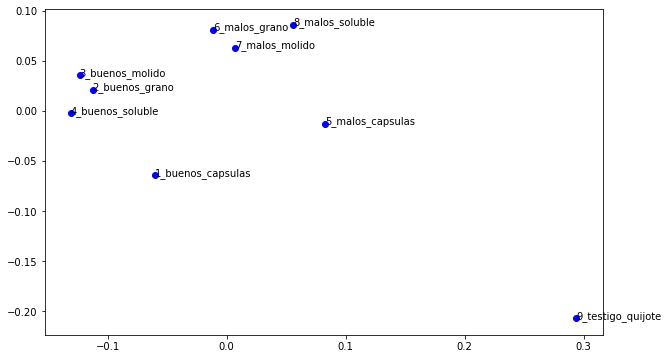

Fin


In [9]:
def ejecutarPrograma(opcion):
   
   '''
   Pasar archivos a una lista
   '''
   path='C:/Users/Armando/Desktop/todos_ansi'
   documents = [] #los ordena por nombre
   titles=[]
   dirs = os.listdir(path)
   for doc in dirs:
       if doc.endswith('.txt'):
           titles.append(doc)
           f=open(os.path.join(path,doc),'r')
           words = f.read()
           documents.append(words)
           f.close()


   #Genera stopwords
   sw=stopwords.words('spanish')


   #Crea los vectores ya sin stopwords y genera matriz tf-idf
   tfidf_vectorizer = TfidfVectorizer(sw)
   tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

   #Se crea diccionario
   diccionario = tfidf_vectorizer.get_feature_names()

   print
   print ('Corroborar tamaño de la matriz Documentos vs Términos')
   print (tfidf_matrix.shape)
   print


   print
   print ('Obteniendo similitud de coseno entre 2 documentos (si son iguales el valor es 1)')
   cosine=cosine_similarity(tfidf_matrix[1], tfidf_matrix[2])
   print (cosine)
   print ('Cálculo de distancia')
   dist = 1 - cosine
   print (dist)
   print
   print ('Ángulo de separación de los documentos (grados)')
   angle_in_radians = math.acos(cosine)
   print (math.degrees(angle_in_radians))
   print
   print ('Área de gráficos')
   
   plt.figure(figsize=(10,6)) #tamaño del gráfico ancho, alto
   dist = 1 - cosine_similarity(tfidf_matrix)
   np.round(dist, 2)
   if opcion=="uno":
       print ('Inicio')
       print ('Impresión de similitud de documentos por método de coseno')
       r = 1
       d = 2 * r * (1 - cosine)
       circle1=plt.Circle((0, 0), r, alpha=.5)
       circle2=plt.Circle((d, 0), r, alpha=.5)
       ## set axis limits
       plt.ylim([-1.1, 1.1])
       plt.xlim([-1.1, 1.1 + d])
       fig = plt.gcf()
       fig.gca().add_artist(circle1)
       fig.gca().add_artist(circle2)
       print ('Fin')
   elif opcion=="dos":
       print ('Inicio')
       print ('Clustering de distancia entre documentos')
       mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
       pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
       xs, ys = pos[:, 0], pos[:, 1]
       names = [os.path.basename(fn).replace('.txt', '') for fn in titles]
       # color-blind-friendly palette
       for x, y, name in zip(xs, ys, names):
          color = 'orange' if "d1" in name else 'blue'
          plt.scatter(x, y, c=color)
          plt.text(x, y, name)
       plt.show()
       print ('Fin')
   elif opcion=="tres":
       print ('Inicio')
       print ('Clustering de documentos en 3D')
       mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
       pos = mds.fit_transform(dist)       
       fig = plt.figure()
       ax = fig.add_subplot(111, projection='3d')
       ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
       for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], titles):
           ax.text(x, y, z, s)
       plt.show()
       print ('Fin')
   else:
       print ('Similitud entre documentos (Dibujar distancia entre ellos)')
       print ('Inicio')
       linkage_matrix = ward(dist)
       dendrogram(linkage_matrix, orientation="right", labels=titles)
       plt.tight_layout()
       plt.show()
       print ('Fin')


print ('Programa que muestra ejemplos gráficos con Machine Learning')
print ('Opciones:')
print ('1.Impresión de similitud de documentos por método de coseno (Intersección de circunferencias)')
print ('2.Clustering de distancia entre documntos')
print ('3.Clustering de documentos en 3D')
print ('4.Similitud entre documentos (Dibujar distancia entre ellos)')
opcion=input()

ejecutarPrograma(opcion)

In [66]:
   path='C:/Users/Armando/Desktop/todos_ansi'
   documents = []
   titles=[]
   dirs = os.listdir(path)
   for doc in dirs:
       if doc.endswith('.txt'):
           titles.append(doc)
           f=open(os.path.join(path,doc),'r')
           words = f.read()
           documents.append(words)
           f.close()

In [67]:
documents[8]

'No es la primera vez (ni será la última) que hablamos del archiconocido Python, y no es para menos. Python es uno de los lenguajes de programación más populares y usados del planeta, y como cada lenguaje tiene su propia estructura y codificación hoy hablaremos de la sintaxis en Python. ¡Toma nota y conoce Python a fondo para convertirte en un programador de primera!\n\n \n\nPython\nPython es un lenguaje de programación interpretado cuya filosofía hace hincapié en la legibilidad de su código. Podríamos decir que es un lenguaje de programación multiparadigma orientado a objetos, programación imperativa y programación funcional. Es un lenguaje interpretado, dinámico y multiplataforma.\n\nPython debe su popularidad a sus múltiples posibilidades y a su facilidad para aprender a programar.\n\n \n\nLa sintaxis de Python\nNadie nace aprendido, y como en cualquier otro lenguaje, en Python es necesario empezar de menos a más, de poquito a poco para conocer a fondo su sintaxis y funcionamiento, 